## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  11.772438  1629.401806  0.543882  5.747385  1.494287
1   6.523572   504.182958  0.735503  6.110937  1.552042
2  80.803389   650.412825  0.915592  7.830448  1.427189
3  89.389937  1542.122732  0.752468  4.859250  1.352242
4  77.454904   917.047605  0.892570  3.007491  1.598734


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.8256883	total: 55.2ms	remaining: 55.1s
1:	learn: 0.8186271	total: 56.9ms	remaining: 28.4s
2:	learn: 0.8124147	total: 58.5ms	remaining: 19.4s
3:	learn: 0.8056643	total: 58.8ms	remaining: 14.6s
4:	learn: 0.8005248	total: 59.1ms	remaining: 11.8s
5:	learn: 0.7937172	total: 59.5ms	remaining: 9.85s
6:	learn: 0.7878324	total: 63.1ms	remaining: 8.95s
7:	learn: 0.7809495	total: 63.5ms	remaining: 7.88s
8:	learn: 0.7744578	total: 63.9ms	remaining: 7.04s
9:	learn: 0.7688365	total: 64.5ms	remaining: 6.39s
10:	learn: 0.7634322	total: 65.2ms	remaining: 5.86s
11:	learn: 0.7575600	total: 65.7ms	remaining: 5.41s
12:	learn: 0.7520763	total: 66.2ms	remaining: 5.03s
13:	learn: 0.7451856	total: 66.7ms	remaining: 4.69s
14:	learn: 0.7383067	total: 67.1ms	remaining: 4.4s
15:	learn: 0.7335200	total: 67.5ms	remaining: 4.15s
16:	learn: 0.7279428	total: 67.8ms	remaining: 3.92s
17:	learn: 0.7232583	total: 68ms	remaining: 3.71s
18:	learn: 0.7192792	total: 68.4ms	remaining: 3

93:	learn: 0.4673317	total: 97.7ms	remaining: 942ms
94:	learn: 0.4658946	total: 98.2ms	remaining: 935ms
95:	learn: 0.4640339	total: 98.5ms	remaining: 927ms
96:	learn: 0.4616223	total: 98.7ms	remaining: 919ms
97:	learn: 0.4597450	total: 98.9ms	remaining: 910ms
98:	learn: 0.4582896	total: 99.2ms	remaining: 903ms
99:	learn: 0.4556401	total: 99.5ms	remaining: 895ms
100:	learn: 0.4538244	total: 99.7ms	remaining: 888ms
101:	learn: 0.4518820	total: 100ms	remaining: 880ms
102:	learn: 0.4495137	total: 101ms	remaining: 875ms
103:	learn: 0.4463806	total: 101ms	remaining: 869ms
104:	learn: 0.4442080	total: 101ms	remaining: 864ms
105:	learn: 0.4415776	total: 102ms	remaining: 859ms
106:	learn: 0.4396085	total: 102ms	remaining: 853ms
107:	learn: 0.4379337	total: 103ms	remaining: 847ms
108:	learn: 0.4350735	total: 103ms	remaining: 842ms
109:	learn: 0.4334266	total: 103ms	remaining: 836ms
110:	learn: 0.4311000	total: 104ms	remaining: 830ms
111:	learn: 0.4293136	total: 104ms	remaining: 825ms
112:	learn:

315:	learn: 0.2467874	total: 178ms	remaining: 385ms
316:	learn: 0.2461422	total: 178ms	remaining: 384ms
317:	learn: 0.2457774	total: 179ms	remaining: 383ms
318:	learn: 0.2452921	total: 179ms	remaining: 382ms
319:	learn: 0.2450659	total: 179ms	remaining: 381ms
320:	learn: 0.2448327	total: 180ms	remaining: 380ms
321:	learn: 0.2446029	total: 180ms	remaining: 379ms
322:	learn: 0.2437196	total: 180ms	remaining: 377ms
323:	learn: 0.2434925	total: 180ms	remaining: 376ms
324:	learn: 0.2427020	total: 181ms	remaining: 375ms
325:	learn: 0.2421903	total: 181ms	remaining: 374ms
326:	learn: 0.2419676	total: 181ms	remaining: 373ms
327:	learn: 0.2415306	total: 181ms	remaining: 371ms
328:	learn: 0.2409222	total: 182ms	remaining: 370ms
329:	learn: 0.2404464	total: 182ms	remaining: 369ms
330:	learn: 0.2399567	total: 182ms	remaining: 368ms
331:	learn: 0.2396208	total: 183ms	remaining: 368ms
332:	learn: 0.2387621	total: 183ms	remaining: 367ms
333:	learn: 0.2381946	total: 183ms	remaining: 366ms
334:	learn: 

592:	learn: 0.1341025	total: 276ms	remaining: 190ms
593:	learn: 0.1339318	total: 277ms	remaining: 189ms
594:	learn: 0.1337656	total: 277ms	remaining: 189ms
595:	learn: 0.1333224	total: 277ms	remaining: 188ms
596:	learn: 0.1328875	total: 278ms	remaining: 188ms
597:	learn: 0.1326803	total: 278ms	remaining: 187ms
598:	learn: 0.1322529	total: 279ms	remaining: 187ms
599:	learn: 0.1318336	total: 279ms	remaining: 186ms
600:	learn: 0.1317744	total: 279ms	remaining: 185ms
601:	learn: 0.1316878	total: 280ms	remaining: 185ms
602:	learn: 0.1312474	total: 280ms	remaining: 184ms
603:	learn: 0.1308428	total: 281ms	remaining: 184ms
604:	learn: 0.1304340	total: 281ms	remaining: 183ms
605:	learn: 0.1300949	total: 281ms	remaining: 183ms
606:	learn: 0.1297908	total: 282ms	remaining: 182ms
607:	learn: 0.1297409	total: 282ms	remaining: 182ms
608:	learn: 0.1294303	total: 283ms	remaining: 182ms
609:	learn: 0.1293743	total: 283ms	remaining: 181ms
610:	learn: 0.1289778	total: 284ms	remaining: 181ms
611:	learn: 

806:	learn: 0.0806123	total: 357ms	remaining: 85.3ms
807:	learn: 0.0805757	total: 357ms	remaining: 84.9ms
808:	learn: 0.0803494	total: 358ms	remaining: 84.4ms
809:	learn: 0.0801201	total: 358ms	remaining: 84ms
810:	learn: 0.0798741	total: 359ms	remaining: 83.6ms
811:	learn: 0.0798454	total: 359ms	remaining: 83.1ms
812:	learn: 0.0796217	total: 359ms	remaining: 82.7ms
813:	learn: 0.0794022	total: 360ms	remaining: 82.2ms
814:	learn: 0.0791605	total: 360ms	remaining: 81.8ms
815:	learn: 0.0791250	total: 361ms	remaining: 81.3ms
816:	learn: 0.0789340	total: 361ms	remaining: 80.9ms
817:	learn: 0.0787058	total: 362ms	remaining: 80.4ms
818:	learn: 0.0786781	total: 362ms	remaining: 80ms
819:	learn: 0.0784819	total: 363ms	remaining: 79.7ms
820:	learn: 0.0781551	total: 363ms	remaining: 79.2ms
821:	learn: 0.0778348	total: 364ms	remaining: 78.7ms
822:	learn: 0.0776128	total: 364ms	remaining: 78.3ms
823:	learn: 0.0773133	total: 365ms	remaining: 78ms
824:	learn: 0.0770943	total: 366ms	remaining: 77.6ms

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

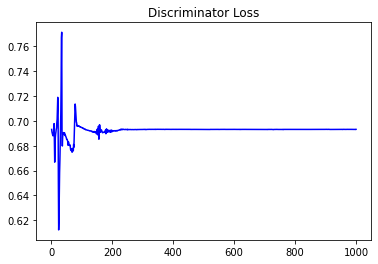

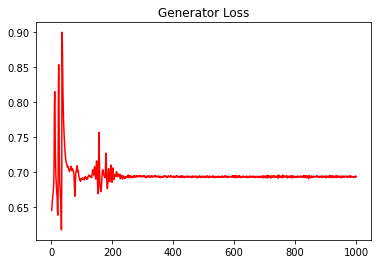

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
1.2026072462093296


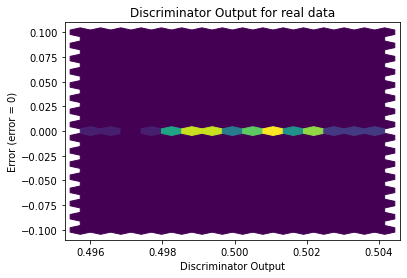

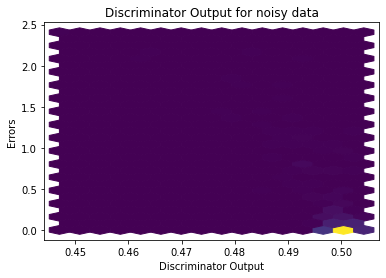

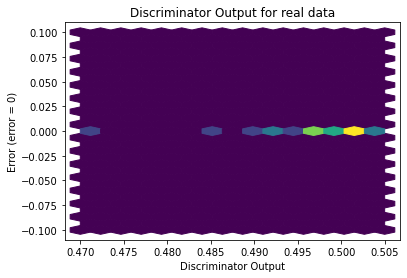

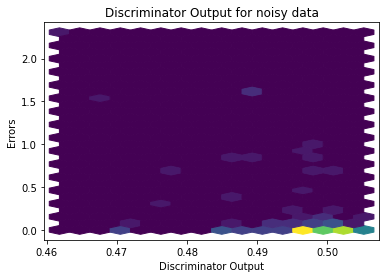

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


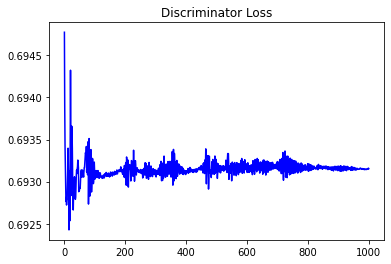

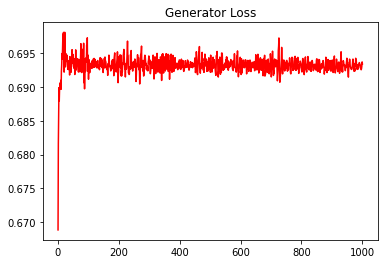

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
1.1612720945739095


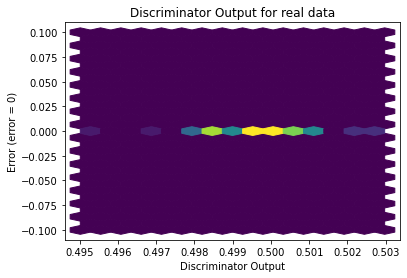

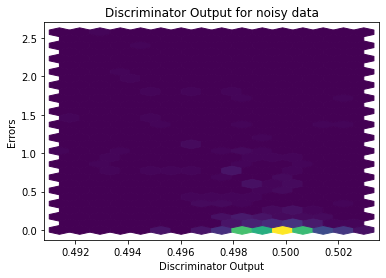

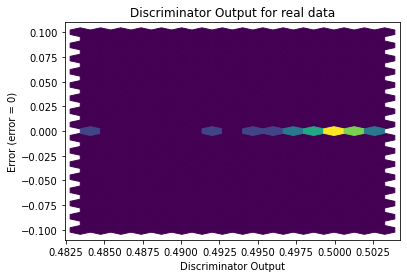

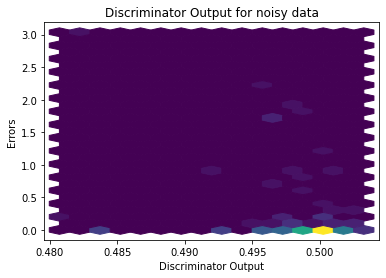

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1121]], requires_grad=True)
